<a href="https://colab.research.google.com/github/gavincapriola/PyTorch-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Networks%2C%20Time%20Series%2C%20and%20Sequence%20Data/PyTorch_Nonlinear_Sequence_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = np.sin((0.1 * np.arange(400)) ** 2)

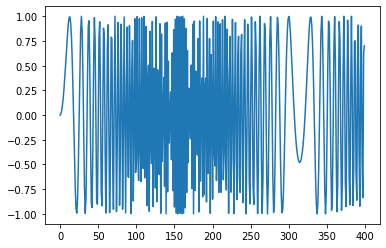

In [3]:
plt.plot(series)
plt.show()

In [4]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t : t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390, 1)


In [5]:
# auto-regressive linear model
model = nn.Linear(T, 1)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [7]:
X_train = torch.from_numpy(X[:-N // 2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N // 2].astype(np.float32))
X_test = torch.from_numpy(X[-N // 2 :].astype(np.float32))
y_test = torch.from_numpy(Y[-N // 2 :].astype(np.float32))

In [8]:
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for it in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        
        train_losses[it] = loss.item()
        
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[it] = test_loss.item()
        
        if(it + 1) % 10 == 0:
            print(f"Epoch {it + 1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")
        
    return train_losses, test_losses

In [9]:
train_losses, test_losses = full_gd(model,
                                    criterion,  
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 10/200, Train Loss: 0.4984, Test Loss: 0.5749
Epoch 20/200, Train Loss: 0.4856, Test Loss: 0.6018
Epoch 30/200, Train Loss: 0.4845, Test Loss: 0.5953
Epoch 40/200, Train Loss: 0.4842, Test Loss: 0.5943
Epoch 50/200, Train Loss: 0.4839, Test Loss: 0.5901
Epoch 60/200, Train Loss: 0.4834, Test Loss: 0.5874
Epoch 70/200, Train Loss: 0.4834, Test Loss: 0.5893
Epoch 80/200, Train Loss: 0.4833, Test Loss: 0.5900
Epoch 90/200, Train Loss: 0.4833, Test Loss: 0.5894
Epoch 100/200, Train Loss: 0.4833, Test Loss: 0.5893
Epoch 110/200, Train Loss: 0.4833, Test Loss: 0.5898
Epoch 120/200, Train Loss: 0.4833, Test Loss: 0.5896
Epoch 130/200, Train Loss: 0.4833, Test Loss: 0.5896
Epoch 140/200, Train Loss: 0.4833, Test Loss: 0.5896
Epoch 150/200, Train Loss: 0.4833, Test Loss: 0.5897
Epoch 160/200, Train Loss: 0.4833, Test Loss: 0.5897
Epoch 170/200, Train Loss: 0.4833, Test Loss: 0.5897
Epoch 180/200, Train Loss: 0.4833, Test Loss: 0.5897
Epoch 190/200, Train Loss: 0.4833, Test Loss: 0.5897
Ep

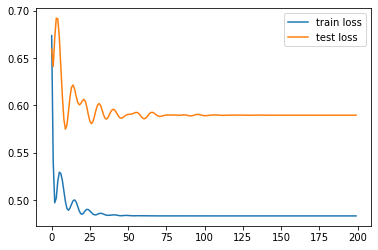

In [10]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [11]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = 0

while len(validation_predictions) < len(validation_target):
    input_ = X_test[i].view(1, -1)
    p = model(input_)[0,0].item() # 1x1 array -> scalar
    i += 1

    # update the predictions list
    validation_predictions.append(p)

In [12]:
# One-step forecast using true targets
# NOTE: even the one-step forecast fails badly
validation_target = Y[-N // 2 :]
with torch.no_grad():
    validation_predictions = model(X_test).numpy()
    # validation_predictions = []

    # # index of first validation input
    # i = 0
    
    # while len(validation_predictions) < len(validation_target):
    #     input_ = X_test[i].view(1, -1)
    #     p = model(input_)[0, 0].item() # 1x1 array -> scalar
    #     i += 1
    
    #     # update the predictions list
    #     validation_predictions.append(p)

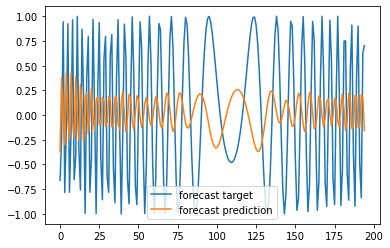

In [13]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()

In [14]:
# Multi-step forecast
validation_target = Y[-N // 2 :]
validation_predictions = []

# last train input
# last_x = torch.from_numpy(X[-N // 2]) # 1D array of length T
last_x = torch.from_numpy(X[-N // 2 - 1].astype(np.float32))

while len(validation_predictions) < len(validation_target):
    input_ = last_x.reshape(1, -1)
    p = model(input_)
    # [0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p[0, 0].item())
    
    # make the new input
    last_x = torch.cat((last_x[1:], p[0]))

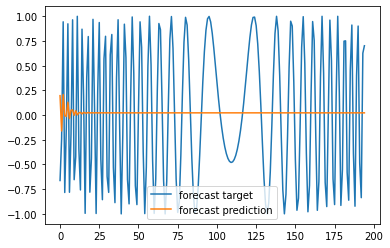

In [15]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()